In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Introduction

We selected a dataset for heart attack classification.
For this project we used 4 differents algoritmhs.


3 from sklearn libeary :
*   Logistic Regression
*   Decision Tree
*   Random Forest

and the last one is a Logistic Regression that we coded by our own.



##About this dataset

    Age : Age of the patient

    Sex : Sex of the patient

    exang: exercise induced angina (1 = yes; 0 = no)

    ca: number of major vessels (0-3)

    cp : Chest Pain type chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic

    trtbps : resting blood pressure (in mm Hg)

    chol : cholestoral in mg/dl fetched via BMI sensor

    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    rest_ecg : resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

    thalach : maximum heart rate achieved

    target : 0= less chance of heart attack 1= more chance of heart attack


# Data Processing

In [ ]:
df = pd.read_csv("./DATA/heart.csv")
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Check if the data is clean

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

As we can see there is no missing data

# Statistiques and visualisation about data

We can see that if we correlate the matrice, the output has a lot of correlation with the others variables

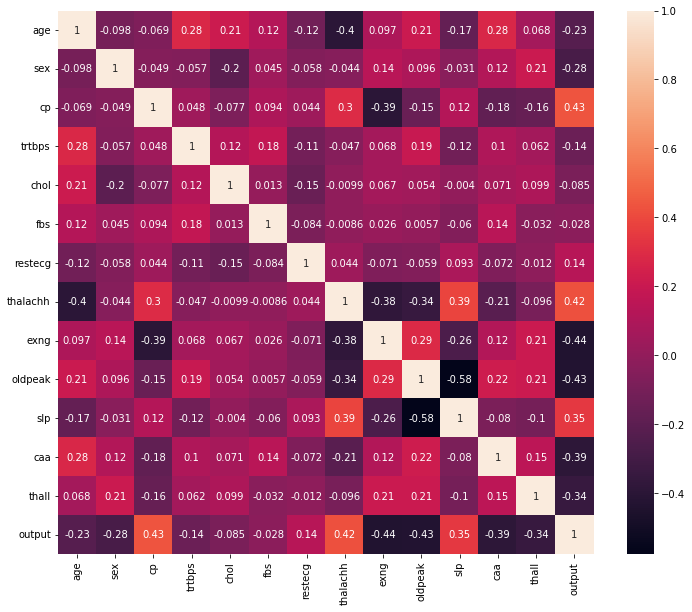

In [ ]:
corr_matrix = df.corr()

fig = plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [ ]:
df.groupby(['output']).mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


After this we can display all the continuous variable and see that they respect a gaussian distribution and the distribution of the 'age', 'oldpeak' and 'tahlach' are different from the persons who had a heart attack or not

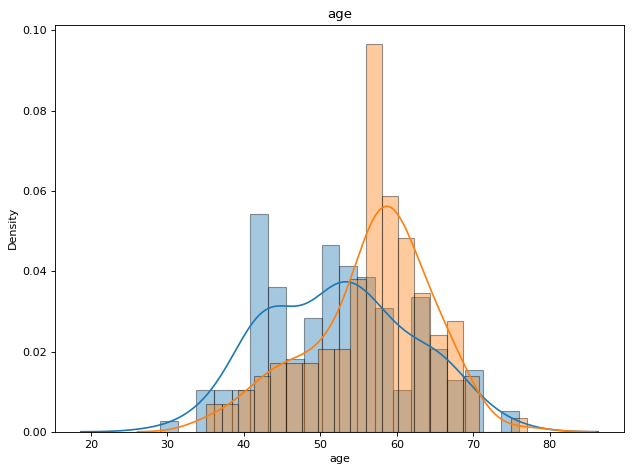

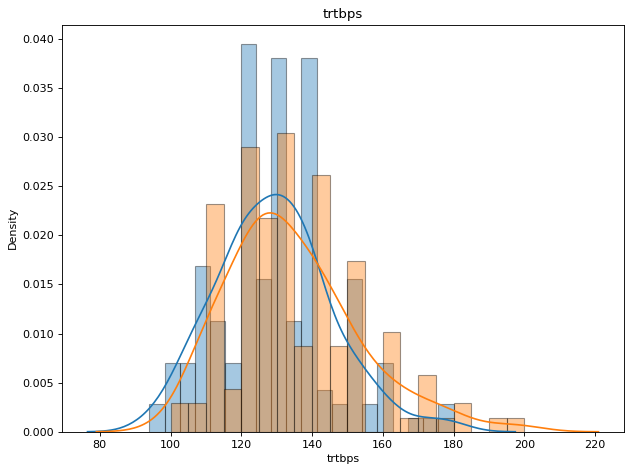

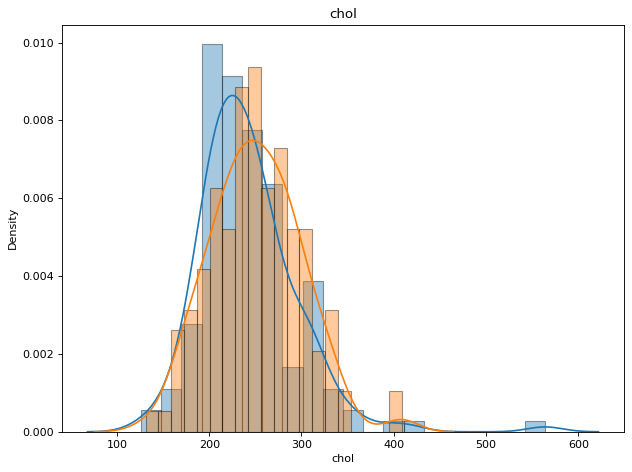

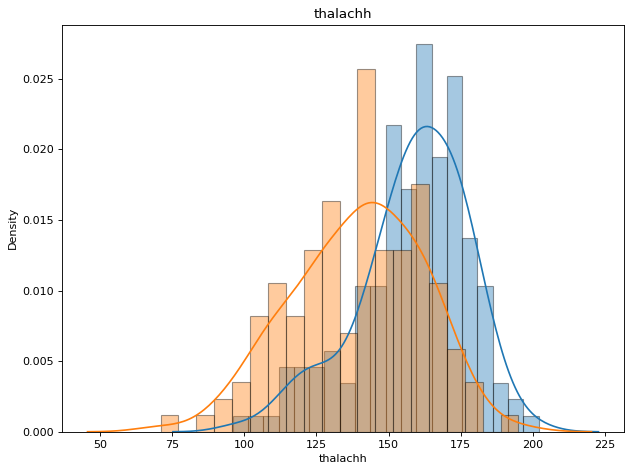

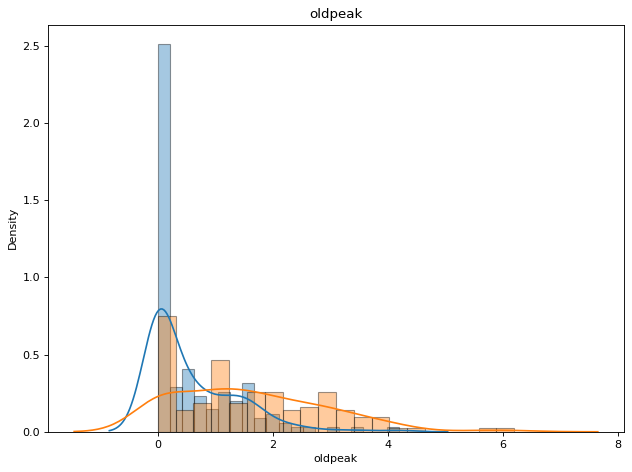

In [ ]:
numvar = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

for i in list(numvar):
    plt.figure(figsize = (8, 6), dpi = 80)
    

    attack = df[df['output'] == 1]
    sns.distplot(attack[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)

    safe = df[df['output'] != 1]
    sns.distplot(safe[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i)
    plt.ylabel("Density")
    
    plt.tight_layout()
    plt.show()

After this we can display all the discretes variables and see that the distribution of the 'sex', 'cp', 'caa', 'thall' and 'exng' are different from the persons who had a heart attack or not

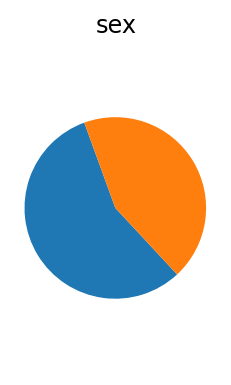

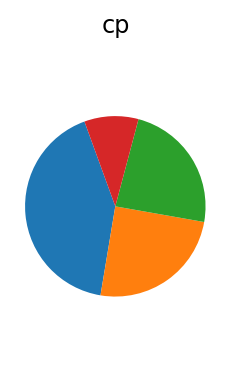

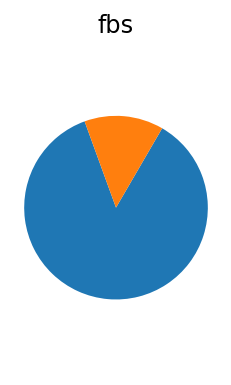

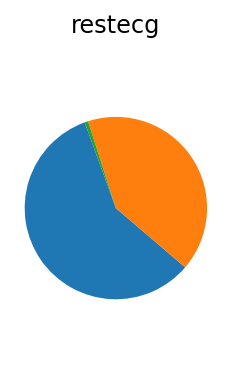

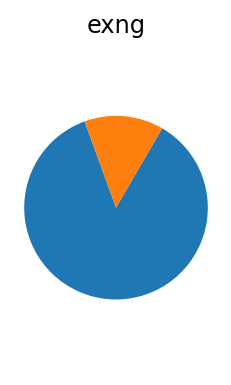

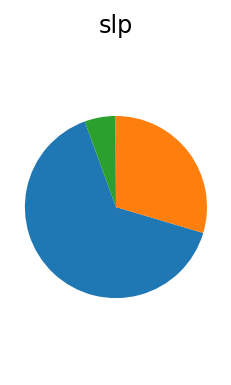

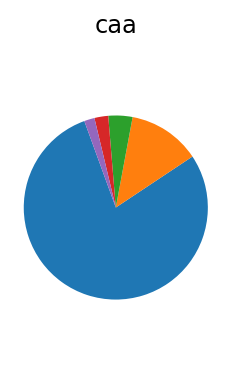

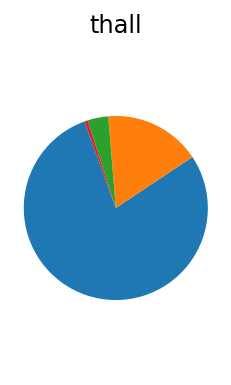

In [ ]:
catvar = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]
for i in list(catvar):
    fig = plt.figure(figsize=(4,3),dpi=144)
    ax1 = fig.add_subplot(121)
  
    
    attack = df[df['output'] == 1]
    observation_values = list(attack[i].value_counts().index)
    total_values = list(attack[i].value_counts())
    ax1.pie(total_values, startangle = 110, labeldistance = 1.1)

    plt.title(i)
    ax1.axis("equal")
    plt.show()

#Algorithms

For this problem, we gonna have to use classifications algorithms to group people if they will have or not a heart attack

**To see the metrics we gonna use the f1 score, recall score, precision score and the roc curve of sklearn**

Generate the dataset of train and test

In [ ]:
labels = df["output"].values
input = df.drop("output",axis=1).values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input, labels, test_size=0.25, random_state=42)

from sklearn.metrics import zero_one_loss, f1_score, recall_score, precision_score, plot_roc_curve

def display_result(model, x_test, y_test, y_pred):
  print("f1 score = {}".format(f1_score(y_test,y_pred)))
  print("recall score = {}".format(recall_score(y_test,y_pred)))
  print("precision score = {}".format(precision_score(y_test,y_pred)))
  plot_roc_curve(model, x_test, y_test)
  return f1_score(y_test,y_pred), recall_score(y_test,y_pred), precision_score(y_test,y_pred)

results = pd.DataFrame([], columns=['Model','f1 score', 'recall score', 'precision score'])


## Sklearn Algorithms


###Logistic Regression

f1 score = 0.8941176470588236
recall score = 0.926829268292683
precision score = 0.8636363636363636


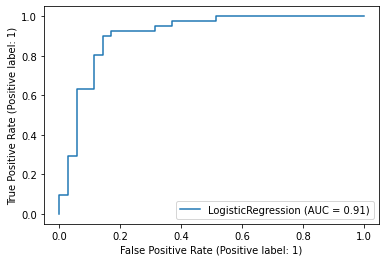

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

result_logistic = display_result(model, x_test, y_test, y_pred)

results.loc[len(results.index)] = ['Logistic Regression', result_logistic[0], result_logistic[1], result_logistic[2]]

##Decision Tree

f1 score = 0.7594936708860759
recall score = 0.7317073170731707
precision score = 0.7894736842105263


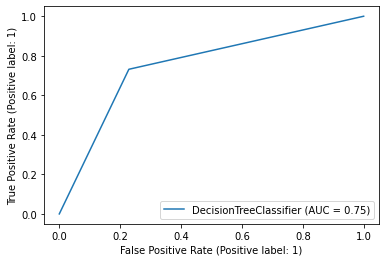

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=123)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
result_clf = display_result(clf, x_test, y_test, y_pred)

results.loc[len(results.index)] = ['Decision Tree',result_clf[0], result_clf[1], result_clf[2]]

###Random Forest

f1 score = 0.7594936708860759
recall score = 0.7317073170731707
precision score = 0.7894736842105263


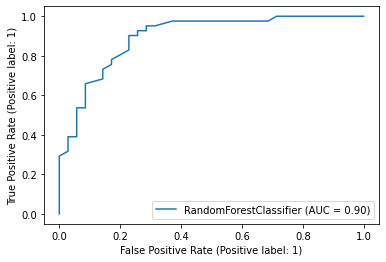

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

result_rf = display_result(rf, x_test, y_test, y_pred)
results.loc[len(results.index)] = ['Random Forest', result_rf[0], result_rf[1], result_rf[2]]

##Own Logistic Regression
For this project we implemented our own Logistic Regression with a basic optimiser and let's compare it to the others algorithms

In [ ]:
class OwnLogistic():
  def __init__(self,Dimensions):
    self.weights = np.full((1,Dimensions),0.1)
    self.biais = 0.1
  
  def sigmoid(self, z):
    return 1/(1+np.exp(-z))
  
  def feed_forward(self, x_train, y_train):
    y_head = self.sigmoid( np.dot(self.weights, x_train) + self.biais )
    loss = (y_train - y_head)**2
    cost = np.mean(loss)
    return y_head, cost
  
  def backward_propogation(self, x_train, y_train, y_head):
    new_weight = (y_head-y_train) @ x_train.T
    new_bias = np.mean(y_head-y_train)
    return new_weight, new_bias


  def learning(self, x_train, y_train, learning_rate, num_iteration):
    cost_list = list()
    cost_list2 = list()
    index = list()
    xticks = list()
    
    for i in range(num_iteration):
        y_head, cost = self.feed_forward(x_train, y_train)
        new_weight, new_bias = self.backward_propogation(x_train, y_train, y_head)
        
        self.weights = self.weights - learning_rate * new_weight
        self.biais = self.biais - learning_rate * new_bias
        
        cost_list.append(cost)
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
    
    fig = plt.figure(figsize = (6,5))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(index, cost_list2, color = "red")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Cost")
    plt.show()
    
    return cost_list

  def predict(self, x_test):
    z = self.sigmoid(np.dot(self.weights, x_test) + self.biais)
    y_pred = np.zeros(x_test.shape[1])
    
    for i in range(z.shape[1]):
        if z[0,i] > 0.5:
            y_pred[i] = 1
  
    return y_pred
  
  def fit(self, x_train, y_train, learning_rate, num_iteration):
    cost_list = self.learning(x_train, y_train, learning_rate, num_iteration)
    return self

We can see that the accurancy score and the time of execution is pretty fast

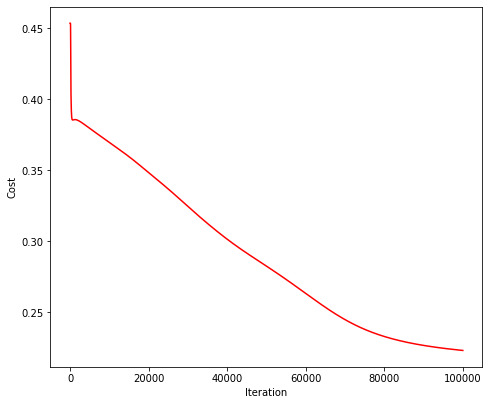

f1 score = 0.8666666666666666
recall score = 0.9512195121951219
precision score = 0.7959183673469388


In [ ]:
Own = OwnLogistic(x_test.shape[1])
Own.fit(x_train.T,y_train.T,21e-7,100000)

y_pred = Own.predict(x_test.T)
score = 100 - np.mean(np.abs(y_pred - y_test)) * 100
print("f1 score = {}".format(f1_score(y_test,y_pred)))
print("recall score = {}".format(recall_score(y_test,y_pred)))
print("precision score = {}".format(precision_score(y_test,y_pred)))
result_own_logistic  = f1_score(y_test,y_pred), recall_score(y_test,y_pred), precision_score(y_test,y_pred)

results.loc[len(results.index)] = ['Own Logistic Regression', result_own_logistic[0], result_own_logistic[1], result_own_logistic[2]]

#Conclusion

As we can see lower, the result of our algorithm is pretty close to the others in this classification.

All of the 4 algorithms are able to detect heart attacks with a good precision score. But for the Tree Classifier and Random Foresst the accuracy of the recall score is pretty low  which mean that it can miss a lot of true positives, and in this situation we gonna prefer to use and algorithm with a lower precision score but with a good recall score to not miss any person with a heart attack risk.

In [ ]:
results.sort_values(by=['f1 score'], ascending=False)

,Model,f1 score,recall score,precision score
0,Logistic Regression,0.894118,0.926829,0.863636
3,Own Logistic Regression,0.866667,0.951220,0.795918
1,Decision Tree,0.759494,0.731707,0.789474
2,Random Forest,0.759494,0.731707,0.789474


In [ ]:
results.sort_values(by=['recall score'], ascending=False)

,Model,f1 score,recall score,precision score
3,Own Logistic Regression,0.866667,0.951220,0.795918
0,Logistic Regression,0.894118,0.926829,0.863636
1,Decision Tree,0.759494,0.731707,0.789474
2,Random Forest,0.759494,0.731707,0.789474


In [ ]:
results.sort_values(by=['precision score'], ascending=False)

,Model,f1 score,recall score,precision score
0,Logistic Regression,0.894118,0.926829,0.863636
3,Own Logistic Regression,0.866667,0.951220,0.795918
1,Decision Tree,0.759494,0.731707,0.789474
2,Random Forest,0.759494,0.731707,0.789474
